In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [55]:
#percent of null values in train
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### Imputing Null values

In [56]:
#For numerical feature, impute with median value
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].median())

In [57]:
#For categorical feature, impute with mode value
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [58]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [59]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Fixing irregularities in 'Item_Fat_Content' feature

In [60]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

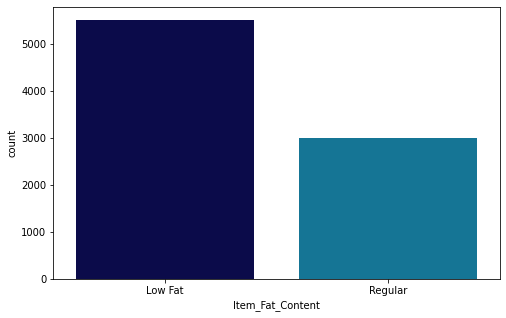

In [61]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

#### Only 2 categories exist now, as all other same name categories with different fonts have been replaced

#### Encoding the categorical features from training and test dataset

In [62]:
#List of Categorical features
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']
train[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [63]:
encode = LabelEncoder()

for feature in categorical_features:
    train[feature] = encode.fit_transform(train[feature])
    
for feature in categorical_features:
    test[feature] = encode.fit_transform(test[feature])

In [64]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Feature Scaling 

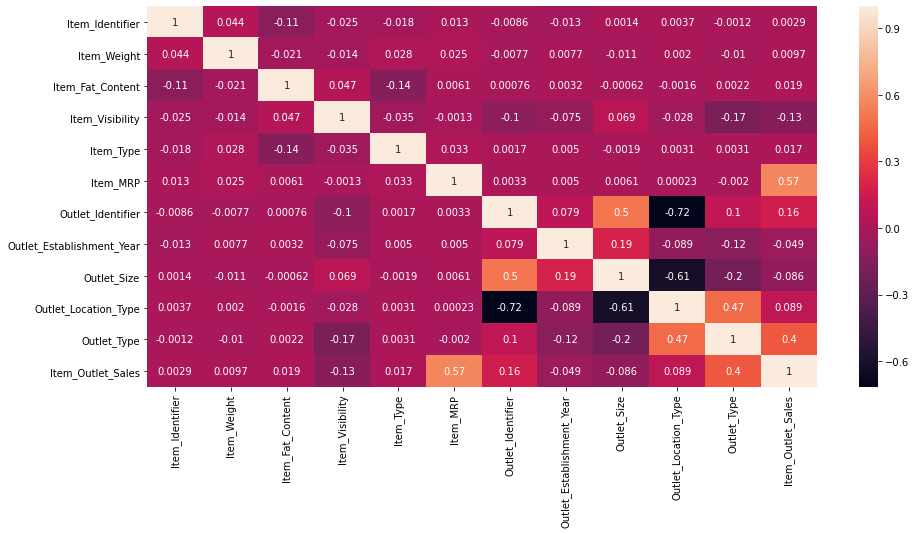

In [65]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True)

#### Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.

In [66]:
scaling_features = [feature for feature in train.columns if feature not in ['Item_Outlet_Sales']]
len(scaling_features)

11

In [67]:
scaler = MinMaxScaler()
scaler.fit_transform(train[scaling_features])

array([[0.10012837, 0.28252456, 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       [0.00513479, 0.08127419, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.42490372, 0.77076511, 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.87098845, 0.35992855, 0.        , ..., 1.        , 0.5       ,
        0.33333333],
       [0.43709884, 0.15808276, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.03209243, 0.61000298, 0.        , ..., 1.        , 0.        ,
        0.33333333]])

In [68]:
#Concat Id, Sale Price to the scaled data after transforming it from array to data frame
dataset = pd.concat([train[['Item_Outlet_Sales']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(train[scaling_features]), columns=scaling_features)],
                    axis=1)

In [69]:
dataset.head()

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,0.100128,0.282525,0.0,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,443.4228,0.005135,0.081274,1.0,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,2097.2700,0.424904,0.770765,0.0,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,732.3800,0.719512,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,994.7052,0.832478,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333


In [70]:
dataset.shape

(8523, 12)

In [71]:
dataset.to_csv('X_train.csv',index=False)

In [75]:
dataset = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [76]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715305,0.964275,0.0,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691958,0.222983,1.0,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911803,0.598095,0.0,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524643,0.164335,0.0,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767834,0.473057,1.0,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000


In [77]:
dataset.to_csv('X_test.csv',index=False)